In [1]:
import torch
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

dtype = torch.float
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device("cpu")

# Util

In [2]:
import os
root_img_path = '/workspace/AIM-lecture-code-samples/assets/forward_demo'
def generate_video(root_img_path):
    os.system(f"ffmpeg -y -r 60 -i {root_img_path}/%4d.png {root_img_path}/forward_demo.mp4")
    os.system(f"rm -rf {root_img_path}/*.png")

# Create random input and output data

In [3]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

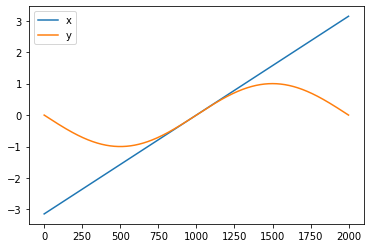

In [4]:
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()

# Randomly initialize weights (Our model)

In [5]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

print(a,b,c,d)

tensor(-0.9849) tensor(-1.0486) tensor(-0.8753) tensor(0.0186)


# Opimise (forward and backward pass)

In [6]:
learning_rate = 1e-6
running_loss = []
for t in range(2000):
    # Forward pass: compute predicted y
    y_hat = a + (b * x) + (c * (x ** 2)) + (d * (x ** 3))


    # Compute and print loss
    loss = (y_hat - y).pow(2).sum().item()
    running_loss.append(loss)

    # Plot our prediction
    plt.figure()
    plt.plot(y_hat, label='y_hat')
    plt.plot(y, label='y')
    plt.legend()
    # plt.savefig(f"{root_img_path}/{t:04}.png")
    clear_output(wait=True)
    plt.show()
    plt.close()

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_hat = 2.0 * (y_hat - y)
    grad_a = grad_y_hat.sum()
    grad_b = (grad_y_hat * x).sum()
    grad_c = (grad_y_hat * x ** 2).sum()
    grad_d = (grad_y_hat * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

KeyboardInterrupt: 